In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Step 1: Check for Missing Values

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [5]:
imputer.fit(df[['bmi']])
df[['bmi']] = imputer.transform(df[['bmi']])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

As we have around 5100 datas in total, we drop the rows with null avlues

In [9]:
df.dropna(inplace=True)

In [10]:
# Remove unused columns
df.drop(['id'],axis=1,inplace=True)

<AxesSubplot:>

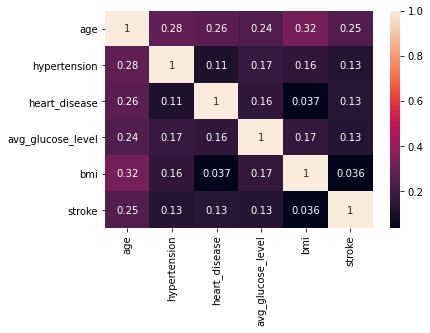

In [11]:
sns.heatmap(df.corr(),annot=True)

From the correlation map, we can't any relationship of features and our target(stroke) as the correlation values are close to 0

<AxesSubplot:xlabel='bmi'>

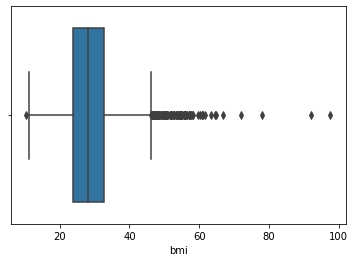

In [12]:
sns.boxplot(x='bmi',data=df)

Outliers can be observed from the box plot

In [13]:
# Remove outliers in bmi
bmi_lq = df.describe().iloc[-2,-2]
bmi_uq = df.describe().iloc[4,-2]
bmi_iqr = bmi_uq-bmi_lq
df = df.loc[df['bmi']<bmi_uq+1.5*bmi_lq]
df = df.drop(df.loc[df['gender']=='Other'].index)

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
# Encoding 1,0
df['gender'] = df['gender'].replace({'Male':1,'Female':0})
df['Residence_type'] = df['Residence_type'].replace({'Urban':1,'Rural':0})
df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})
df
# df['Residence_type']=pd.get_dummies(df['Residence_type'])
# df[['gender','work_type','Residence_type','smoking_status']].value_counts()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5101,0,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
5102,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5103,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5104,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [17]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
df2 = df[['work_type','smoking_status']]
encoded_df = encoder.fit_transform(df2).toarray()
encoded_df

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names(df2.columns))
encoded_df

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
5101,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5102,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5103,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5104,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df = df.drop(['work_type','smoking_status'],axis=1)

In [20]:
processed_df = pd.concat([df,encoded_df],axis=1)
processed_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,79.0,1,0,1,0,174.12,24.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,0,80.0,1,0,1,1,83.75,28.1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5102,0,81.0,0,0,1,1,125.20,40.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5103,0,35.0,0,0,1,0,82.99,30.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5104,1,51.0,0,0,1,0,166.29,25.6,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
processed_df['stroke'].value_counts()
# Imbalance dataset
# --> Sampling

0    4857
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

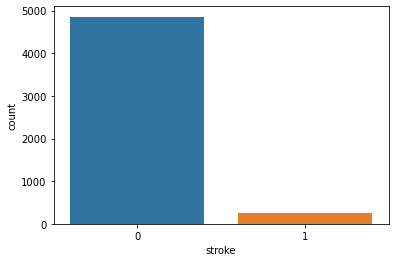

In [22]:
sns.countplot(x='stroke',data=processed_df)

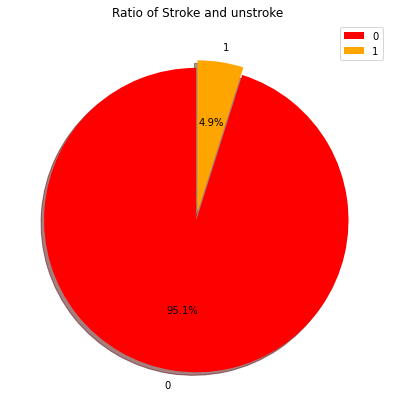

In [23]:
labels =processed_df['stroke'].value_counts(sort = True).index
sizes = processed_df['stroke'].value_counts(sort = True)

colors = ["red","orange"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
# explode --> extruded out
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.legend()
plt.title('Ratio of Stroke and unstroke')
plt.show()

In [24]:
X = processed_df.drop('stroke',axis=1)
y = processed_df['stroke']
print(X.shape)
print(y.shape)

(5106, 15)
(5106,)


In [ ]:
# Oversampling
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=41)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)